In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#restaurant per year
restaurants_year = pd.read_csv('C:/Users/Vijay/Desktop/Sem2/big data project/Data Exploration/restaurants/data/new_restaurants_by_boro_year.out', names=['Boro', 'Year', 'Restaurants'])

In [34]:
#remove whitespace and punctuation from data
for c in restaurants_year.columns:
    restaurants_year[c] = restaurants_year[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        restaurants_year[c] = restaurants_year[c].astype(int)
        
#removing data with count equals and less than 1
restaurants_year = restaurants_year[restaurants_year['Restaurants']>1]

#removing data after 2015
restaurants_year = restaurants_year[restaurants_year['Year']<=2015]
years  = restaurants_year['Year'].unique()
restaurants_year = restaurants_year.set_index(['Year','Boro'])

In [35]:
restaurants_year

,,Restaurants
Year,Boro,
2013,BRONX,47
2014,BRONX,231
2015,BRONX,256
2013,BROOKLYN,145
2014,BROOKLYN,604
2015,BROOKLYN,741
2013,MANHATTAN,233
2014,MANHATTAN,905
2015,MANHATTAN,1043


In [39]:
#yearly felony
felonies_year = pd.read_csv('C:/Users/Vijay/Desktop/Sem2/big data project/Data Exploration/restaurants/data/felony_crime_by_year.out', names=['Boro', 'Felonies'])
felonies_split = felonies_year['Boro'].apply(lambda x: str(x).split('_'))
felonies_year['Boro'] = [x[0] for x in felonies_split]
felonies_year['Year'] = [x[1] for x in felonies_split]
for c in felonies_year.columns:
    felonies_year[c] = felonies_year[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        felonies_year[c] = felonies_year[c].astype(int)


felonies_year = felonies_year[['Boro', 'Year', 'Felonies']]
        
felonies_year = felonies_year[felonies['Boro']!='']
felonies_year = felonies_year.set_index(['Year', 'Boro'])

In [40]:
felonies_year

,,Felonies
Year,Boro,
2013,BRONX,28541
2014,BRONX,28538
2015,BRONX,30063
2013,BROOKLYN,50268
2014,BROOKLYN,49554
2015,BROOKLYN,47942
2013,MANHATTAN,36334
2014,MANHATTAN,34575
2015,MANHATTAN,35972


,Year,Boro,Felonies,Restaurants
0,2013,BRONX,28541,47
3,2013,BROOKLYN,50268,145
6,2013,MANHATTAN,36334,233
9,2013,QUEENS,34325,89
12,2013,STATEN ISLAND,5186,19
1,2014,BRONX,28538,231
4,2014,BROOKLYN,49554,604
7,2014,MANHATTAN,34575,905
10,2014,QUEENS,33405,616
13,2014,STATEN ISLAND,5137,77


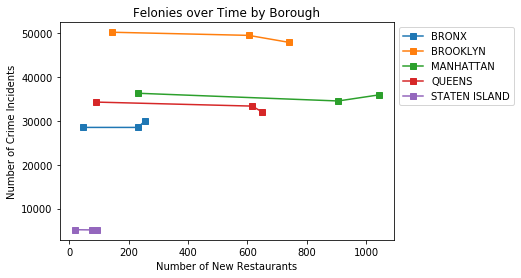

In [41]:
d_frame = pd.concat([felonies_year, restaurants_year], axis=1, join='inner').reset_index().sort_values('Year')
display(d_frame)
for boro in d_frame['Boro'].unique():
    data = d_frame[d_frame['Boro']==boro]
    plt.plot(data['Restaurants'], data['Felonies'], marker='s', label=boro)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Number of New Restaurants')
plt.title('Felonies over Time by Borough')
plt.show()

In [42]:
d_frame['Restaurants'] = d_frame['Restaurants'] - np.mean(d_frame['Restaurants']) 
model = smf.ols(formula='Felonies ~ C(Boro) + C(Year) + Restaurants', data=d_frame)
result = model.fit()
print(result.summary())

C:\Users\Vijay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:               Felonies   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     582.6
Date:                Tue, 01 May 2018   Prob (F-statistic):           3.87e-09
Time:                        01:24:28   Log-Likelihood:                -117.11
No. Observations:                  15   AIC:                             250.2
Df Residuals:                       7   BIC:                             255.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [47]:
#yearly misdemeanors
misdemeanors_year = pd.read_csv('C:/Users/Vijay/Desktop/Sem2/big data project/Data Exploration/restaurants/data/misdemeanors_crime_by_year.out', names=['Boro', 'Misdemeanors'])
misdemeanors_split = misdemeanors_year['Boro'].apply(lambda x: str(x).split('_'))
misdemeanors_year['Boro'] = [x[0] for x in misdemeanors_split]
misdemeanors_year['Year'] = [x[1] for x in misdemeanors_split]
for c in misdemeanors_year.columns:
    misdemeanors_year[c] = misdemeanors_year[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        misdemeanors_year[c] = misdemeanors_year[c].astype(int)

misdemeanors_year = misdemeanors_year[['Boro', 'Year', 'Misdemeanors']]
misdemeanors_year = misdemeanors_year[felonies['Boro']!='']
misdemeanors_year = misdemeanors_year.set_index(['Year', 'Boro'])

In [48]:
misdemeanors_year

,,Misdemeanors
Year,Boro,
2013,BRONX,63452
2014,BRONX,64367
2015,BRONX,61570
2013,BROOKLYN,82029
2014,BROOKLYN,79503
2015,BROOKLYN,75330
2013,MANHATTAN,70238
2014,MANHATTAN,66385
2015,MANHATTAN,64365


,Year,Boro,Misdemeanors,Restaurants
0,2013,BRONX,63452,47
3,2013,BROOKLYN,82029,145
6,2013,MANHATTAN,70238,233
9,2013,QUEENS,54682,89
12,2013,STATEN ISLAND,13366,19
1,2014,BRONX,64367,231
4,2014,BROOKLYN,79503,604
7,2014,MANHATTAN,66385,905
10,2014,QUEENS,53604,616
13,2014,STATEN ISLAND,13327,77


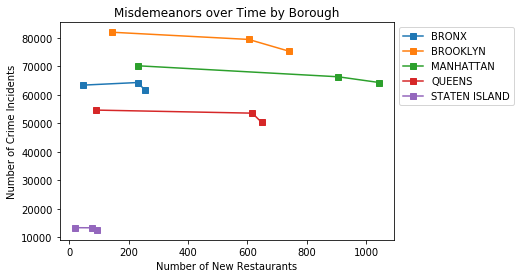

In [49]:
d_frame = pd.concat([misdemeanors_year, restaurants_year], axis=1, join='inner').reset_index().sort_values('Year')
display(d_frame)
for boro in d_frame['Boro'].unique():
    data = d_frame[d_frame['Boro']==boro]
    plt.plot(data['Restaurants'], data['Misdemeanors'], marker='s', label=boro)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Number of New Restaurants')
plt.title('Misdemeanors over Time by Borough')
plt.show()

In [52]:
#yearly voilation
voilation_year = pd.read_csv('C:/Users/Vijay/Desktop/Sem2/big data project/Data Exploration/restaurants/data/voilation_crime_by_year.out', names=['Boro', 'Voilation'])
voilation_split = voilation_year['Boro'].apply(lambda x: str(x).split('_'))
voilation_year['Boro'] = [x[0] for x in voilation_split]
voilation_year['Year'] = [x[1] for x in voilation_split]
for c in voilation_year.columns:
    voilation_year[c] = voilation_year[c].apply(lambda x: str(x).strip().strip(r"[()']*"))
    if c!='Boro':
        voilation_year[c] = voilation_year[c].astype(int)

voilation_year = voilation_year[['Boro', 'Year', 'Voilation']]
voilation_year = voilation_year[felonies['Boro']!='']
voilation_year = voilation_year.set_index(['Year', 'Boro'])

In [53]:
voilation_year

,,Voilation
Year,Boro,
2013,BRONX,12504
2014,BRONX,13032
2015,BRONX,13366
2013,BROOKLYN,18040
2014,BROOKLYN,19780
2015,BROOKLYN,19990
2013,MANHATTAN,11618
2014,MANHATTAN,12300
2015,MANHATTAN,12781


,Year,Boro,Voilation,Restaurants
0,2013,BRONX,12504,47
3,2013,BROOKLYN,18040,145
6,2013,MANHATTAN,11618,233
9,2013,QUEENS,12477,89
12,2013,STATEN ISLAND,4108,19
1,2014,BRONX,13032,231
4,2014,BROOKLYN,19780,604
7,2014,MANHATTAN,12300,905
10,2014,QUEENS,13416,616
13,2014,STATEN ISLAND,4396,77


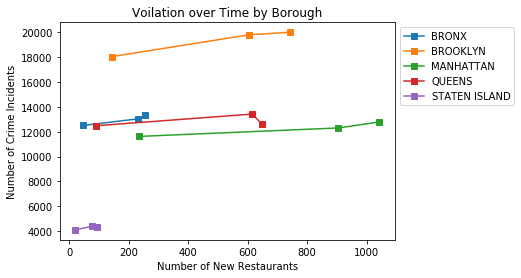

In [54]:
d_frame = pd.concat([voilation_year, restaurants_year], axis=1, join='inner').reset_index().sort_values('Year')
display(d_frame)
for boro in d_frame['Boro'].unique():
    data = d_frame[d_frame['Boro']==boro]
    plt.plot(data['Restaurants'], data['Voilation'], marker='s', label=boro)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime Incidents')
plt.xlabel('Number of New Restaurants')
plt.title('Voilation over Time by Borough')
plt.show()